In [ ]:
# get some stuff from libraries to make things easier
import numpy as np
from PIL import Image
from IPython.display import Image as DisplayImage

## Image Representation

An image in memory is just a multi-dimensional array of pixels of size

`<image height> x <image width> x <number of channels>`

where the number of channels varies by image format. For example, a JPEG has 3 channels (red, green, blue), while a PNG has 4 (red, green, blue, alpha/opacity) and some legacy Black and White image formats have only one (lightness).

This is why JPEG is often called an 'RGB' image (red, green, blue) and PNG is called 'RGBA' (red, green, blue, alpha). Some other formats exist, like a particular machine learning tool people use to detect things images uses BGR (blue, green, red) so if you convert those images using normal tools they end up all the wrong colours because the memory was read in the wrong order.

Values are stored as an 8 'bit' (digit) binary number that can only store 256 values, which means the range for each channel goes from 0-255. This is because 0 in 8b binary is `00000000` and 255 is `11111111`; to store 256 or above, more digits are needed.

So in computer memory, an image might look something like this (small example image on left, memory representation on right):

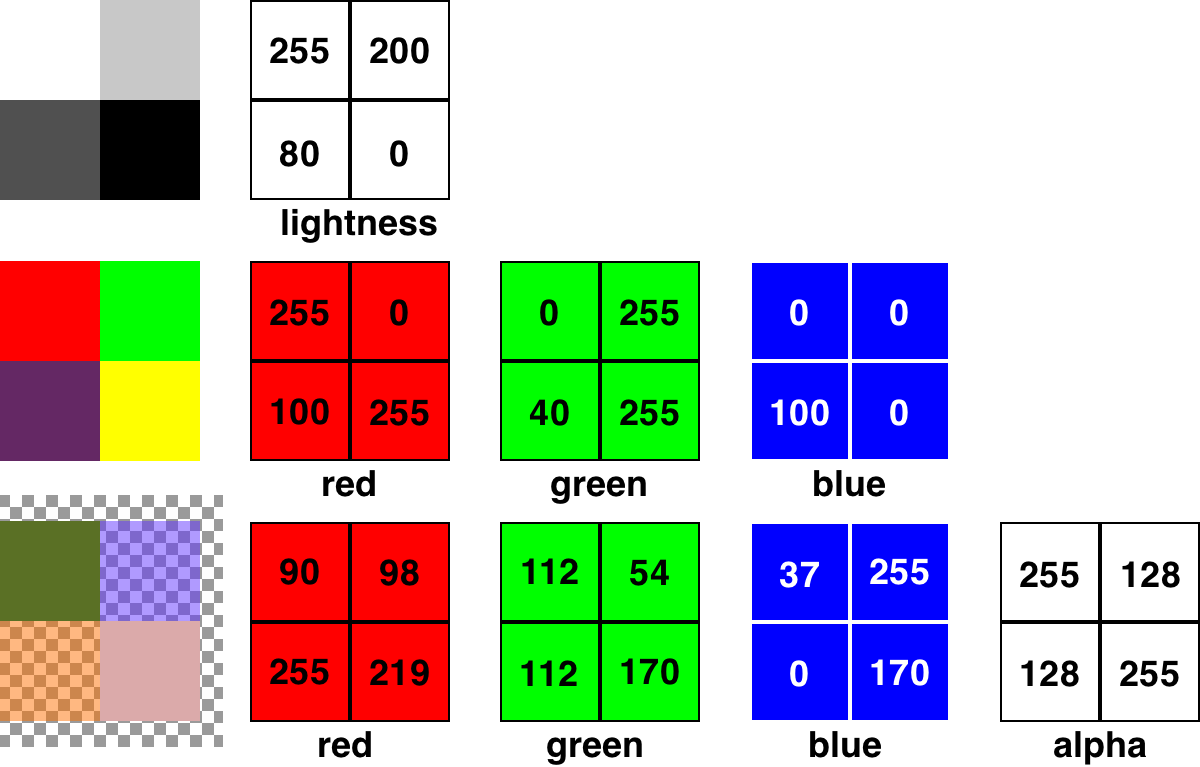

So we can change parts of an image or apply a transformation to the whole image very easily, by just reading through the arrays and changing things. For example, to invert an image you might say something *like*:

```python
for each pixel in image:
    old_value = image[y][x][channel]
    new_value = 255 - old_value
    # (flip it, so say 55 will now be 255 - 55 = 200)
    image[y][x][channel] = new_value
```

Or to make an RGB image black and white:

```python
for each pixel in image:
    red, green, blue = image[y][x]
    average = (red + green + blue) / 3
    new_pixel = [average, average, average]
    # (when RGB values are all the same they make grey)
    image[y][x] = new_pixel
```

So now let's give it a go with our own image...

In [ ]:
MAX = 255.0

# function that takes an image and its attributes
# and produces a version with inverted colours
def invert_image(image, width, height, channels):
    new_image = image
    for x in range(width):
        for y in range(height):
            # now within this pixel, step through the channels
            for c in range(channels):
                pixel = image[y][x][c]
                new_image[y][x][c] = MAX - pixel
    return new_image

# function that takes an image and its attributes
# and produces a grayscale version
def grayscale_image(image, width, height, channels):
    new_image = image
    for x in range(width):
        for y in range(height):
            # now in this pixel we need the average of the channels
            pixel_sum = 0
            for c in range(channels):
                pixel_sum += image[y][x][c]
            average = pixel_sum / channels
            # and then assign that back to each channel
            for c in range(channels):
                new_image[y][x][c] = MAX - average
    return new_image

# function that takes an image and its attributes
# and produces a version that is red and black
def mona_image(image, width, height, channels):
    if channels < 3: return image # can't make a grayscale image red
    new_image = image
    for x in range(width):
        for y in range(height):
            pixel = image[y][x]
            red, blue, green = pixel[0], pixel[1], pixel[2]
            # get the grayscale darkness you would assign
            darkness = MAX - (sum([red, blue, green]) / 3)
            # instead, assign that amount of red and none of anything else
            new_pixel = [MAX - darkness, 0, 0]
            if channels == 4: new_pixel += [MAX]
            new_image[y][x] = new_pixel
    return new_image

In [ ]:
def get_image(filepath):
    image_array = np.array(Image.open(filepath))
    height, width = (image_array.shape[0], image_array.shape[1])
    return image_array, height, width

def save_image(array, filepath):
    Image.fromarray(array).save(filepath)
    return DisplayImage(filepath)

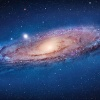

In [ ]:
# get an original image
input_filename = '/content/test.jpg'
# if you want to use your own image you have to open the left sidebar and upload one
# to that spot and with that name, else change the input_filename ^^^
DisplayImage(input_filename)

In [ ]:
# get values and attributes of original image
# (this is stupid syntax but it's just converting the image into a usable array)
image_array = np.array(Image.open(input_filename))
# get the "shape" which is the size of each dimension (height, width, channels)
height, width = (image_array.shape[0], image_array.shape[1])
channels = 1 if len(image_array.shape) == 2 else image_array.shape[2]

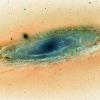

In [ ]:
inverted = invert_image(image_array, width, height, channels)
save_image(inverted, '/content/inverted.jpg')

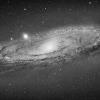

In [ ]:
grayscale = grayscale_image(image_array, width, height, channels)
save_image(grayscale, '/content/grayscale.jpg')

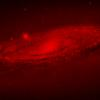

In [ ]:
mona = mona_image(image_array, width, height, channels)
save_image(mona, '/content/mona.jpg')

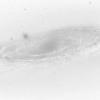

In [ ]:
# function that takes an image and its attributes
# and produces a version that is red and black
def test_image(image, overlay, width, height, channels):
    if channels < 3: return image # can't make a grayscale image red
    new_image = image
    for x in range(width):
        for y in range(height):
            grey = 255 - (sum(image[y][x]) / 3.0)
            #red = sum(overlay[x][y]) / 3.0
            new_red = grey#min(grey + red, 255) # clamp to max value
            new_image[y][x] = [grey, grey, grey]
    return new_image

overlay = np.array(Image.open('/content/filter.jpg'))
test = test_image(image_array, overlay, width, height, channels)
save_image(test, '/content/test1.jpg')